<a href="https://colab.research.google.com/github/sairamarjun/aiprojectsforbiomedicalengineers/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/val'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg.input


<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders =('/content/drive/MyDrive/Dataset/train')
print(len(folders))

36


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(20, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 582 images belonging to 20 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 84 images belonging to 20 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=18,
  steps_per_epoch=18,
  validation_steps=15,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
18/18 - 14s - loss: 2.3773 - accuracy: 0.9127 - val_loss: 145.2406 - val_accuracy: 0.1786

Epoch 00001: val_loss improved from inf to 145.24057, saving model to mymodel.h5
Epoch 2/18
18/18 - 12s - loss: 4.2552 - accuracy: 0.8958
Epoch 3/18
18/18 - 11s - loss: 4.2024 - accuracy: 0.9018
Epoch 4/18
18/18 - 12s - loss: 3.3996 - accuracy: 0.9000
Epoch 5/18
18/18 - 11s - loss: 3.1012 - accuracy: 0.9055


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f329288a830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 6/18
18/18 - 12s - loss: 2.8755 - accuracy: 0.9164
Epoch 7/18
18/18 - 12s - loss: 3.1707 - accuracy: 0.9182
Epoch 8/18
18/18 - 12s - loss: 3.9351 - accuracy: 0.9036
Epoch 9/18
18/18 - 11s - loss: 3.0070 - accuracy: 0.9182
Epoch 10/18
18/18 - 11s - loss: 3.7713 - accuracy: 0.8982
Epoch 11/18
18/18 - 12s - loss: 3.2885 - accuracy: 0.9073
Epoch 12/18
18/18 - 12s - loss: 2.6021 - accuracy: 0.9091
Epoch 13/18
18/18 - 12s - loss: 3.3583 - accuracy: 0.9091
Epoch 14/18
18/18 - 12s - loss: 2.3490 - accuracy: 0.9291
Epoch 15/18
18/18 - 12s - loss: 4.2555 - accuracy: 0.8945
Epoch 16/18
18/18 - 12s - loss: 3.8916 - accuracy: 0.9145
Epoch 17/18
18/18 - 11s - loss: 2.9660 - accuracy: 0.9218
Epoch 18/18
18/18 - 12s - loss: 1.9211 - accuracy: 0.9345
Training completed in time:  0:05:12.023094


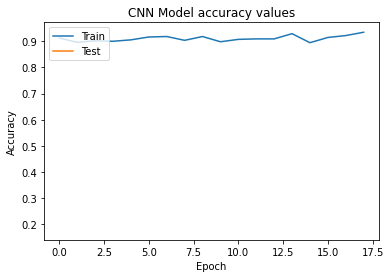

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])


plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'mymodel.hdf5')

In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 4.1MB/s 
     |████████████████████████████████| 4.2MB 34.3MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 174kB 17.4MB/s 
     |████████████████████████████████| 112kB 44.5MB/s 
     |████████████████████████████████| 122kB 40.2MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=6b00de3be5bbeb00a37135c8c311867043bdabdaf9a36bba8810ce2db8daf59f
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


this is the format i have used in my website. u can change as your wish
st.write allpws you to write and display any sentence you want 

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/mymodel.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # MEDICAL INSTRUMENT DETECTION USING AI
           by V A SAIRAM AND ARJUN BATTACHARYA
         """
         )
st.write(""" this model can detect some of the commonly seen medical instruments in any hospital. There are two types of medical devices namely diagnostic(used to find something) and therapeutic(used to treat something)""")
st.write("""   The diagnostic devices for which the model is trained are:-
              'diagnostic- CT', 
              'diagnostic- ECG', 
              'diagnostic- EEG', 
              'diagnostic- EMG', 
              'diagnostic- MRI', 
              'diagnostic- PET', 
              'diagnostic- Xray', 
              'diagnostic- blood glucose sensor', 
              'diagnostic- blood pressure sensor', 
              'diagnostic-endoscopy', 
              'diagnostic- pulse oximeter'
             The therapeutic devices for which the model is trained are:-
              'therapeutic- CPR device', 
              'therapeutic- TENS', 
              'therapeutic- catheter',  
              'therapeutic- defibrilator', 
              'therapeutic- dialyser', 
              'therapeutic- heart lung machine', 
              'therapeutic- oxygen concentrator', 
              'therapeutic- pacemaker', 
              'therapeutic- ventilator' """
             )
file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile", type=["jpg", "png","jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
    st.text("Please upload an image file within the allotted file size")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names= ['diagnostic- CT', 
                  'diagnostic- ECG', 
                  'diagnostic- EEG', 
                  'diagnostic- EMG', 
                  'diagnostic- MRI', 
                  'diagnostic- PET', 
                  'diagnostic- Xray', 
                  'diagnostic- blood glucose sensor', 
                  'diagnostic- blood pressure sensor', 
                  'diagnostic-endoscopy', 
                  'diagnostic- pulse oximeter', 
                  'therapeutic- CPR device', 
                  'therapeutic- TENS', 
                  'therapeutic- catheter',  
                  'therapeutic- defibrilator', 
                  'therapeutic- dialyser', 
                  'therapeutic- heart lung machine', 
                  'therapeutic- oxygen concentrator', 
                  'therapeutic- pacemaker', 
                  'therapeutic- ventilator']
    string= "THE UPLOADED IMAGE IS: " + class_names[np.argmax(predictions)]
    st.success(string) 
  

Overwriting app.py


#METHOD 1- ALTERNATIVE METHOD 

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-06-22 13:48:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.193.24.98, 54.225.197.119, 34.203.109.182, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.193.24.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  6.54MB/s    in 2.0s    

2021-06-22 13:48:08 (6.54 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'
    

Execute the next cell and the go to the following URL: https://c292beb841d7.ngrok.io


execute the next cell and then go to the link. since we are using the free version the web experiences many problems. Paid versions can overcome these problems

1. the tunnel may not be availble

2. the image will not upload and show error

3. the URL will expire soon

4. the URL cannot withstand multiple traffics

5. any reloading can make URL vanish

under these circumstances the code from !wget has to be run again and a new URL is created.

In [ ]:
!streamlit run /content/app.py

2021-06-22 13:48:52.653657: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.23.192:8501

2021-06-22 13:48:54.506225: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-22 13:48:54.511613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-22 13:48:54.512027: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-22 13:48:54.512085: I tensorflow/stream_executor/platform/default/dso_

0- diagnostic- CT

1- diagnostic- ECG

2- diagnostic- EEG

3- diagnostic- EMG

4- diagnostic- MRI

5- diagnostic- PET

6- diagnostic- Xray

7- diagnostic- blood glucose sensor

8- diagnostic- blood pressure sensor

9- diagnostic- endoscopy

10- diagnostic- pulse oximeter

11- therapeutic- CPR device

12- therapeutic- TENS

13- therapeutic- catheter

14- therapeutic- defibrilator

15- therapeutic- dialyser

16- therapeutic- heart lung machine

17- therapeutic- liver support machine

18- therapeutic- pacemaker

19- therapeutic- ventilator

# METHOD 2 - STRAIGHT METHOD (many will not get this so i suggested the previous method)

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 4.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=ce048428d1710301bcc0fbd70210a4fb9d41b1482bc89eec41d57b1198821908
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1uFnskmykjKUith7LlfJO79LlMs_2SKemprJssjine5Aj3iHB

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

t=2021-06-22T12:44:03+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=52d978f0d2e314d1 err="Your account may not run more than 4 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_1uIuy7ZB8Lj2ZnLHMJPxRiE1iNr, tn_1uIuPH3B7ygjpJxtvmlhHXiq1bI, tn_1uIuy6IYvaVkLfvpfa6w5WQo4im, tn_1uIuPGvbErOZU36c9JIDt2dxBs2\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ignored

In [ ]:
!cat /content/nohup.out

2021-06-22 12:36:22.964093: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.23.192:8501

2021-06-22 12:36:24.746304: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-22 12:36:24.752131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-22 12:36:24.752566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-22 12:36:24.752603: I tensorflow/stream_executor/platform/default/dso_